In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# load the dataset universities.csv
df = pd.read_csv('universities.csv')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# scale the numeric features of the dataset using minmax scaler. exclude the Univ feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('Univ', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [4]:
df_scaled.describe().round(3)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000,25.000,25.000,25.000,25.000,25.000
mean,0.638,0.673,0.332,0.354,0.341,0.657
std,0.264,0.270,0.260,0.214,0.263,0.302
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.573,0.639,0.132,0.263,0.117,0.467
50%,0.683,0.736,0.289,0.316,0.344,0.767
75%,0.817,0.861,0.474,0.421,0.477,0.900
max,1.000,1.000,1.000,1.000,1.000,1.000


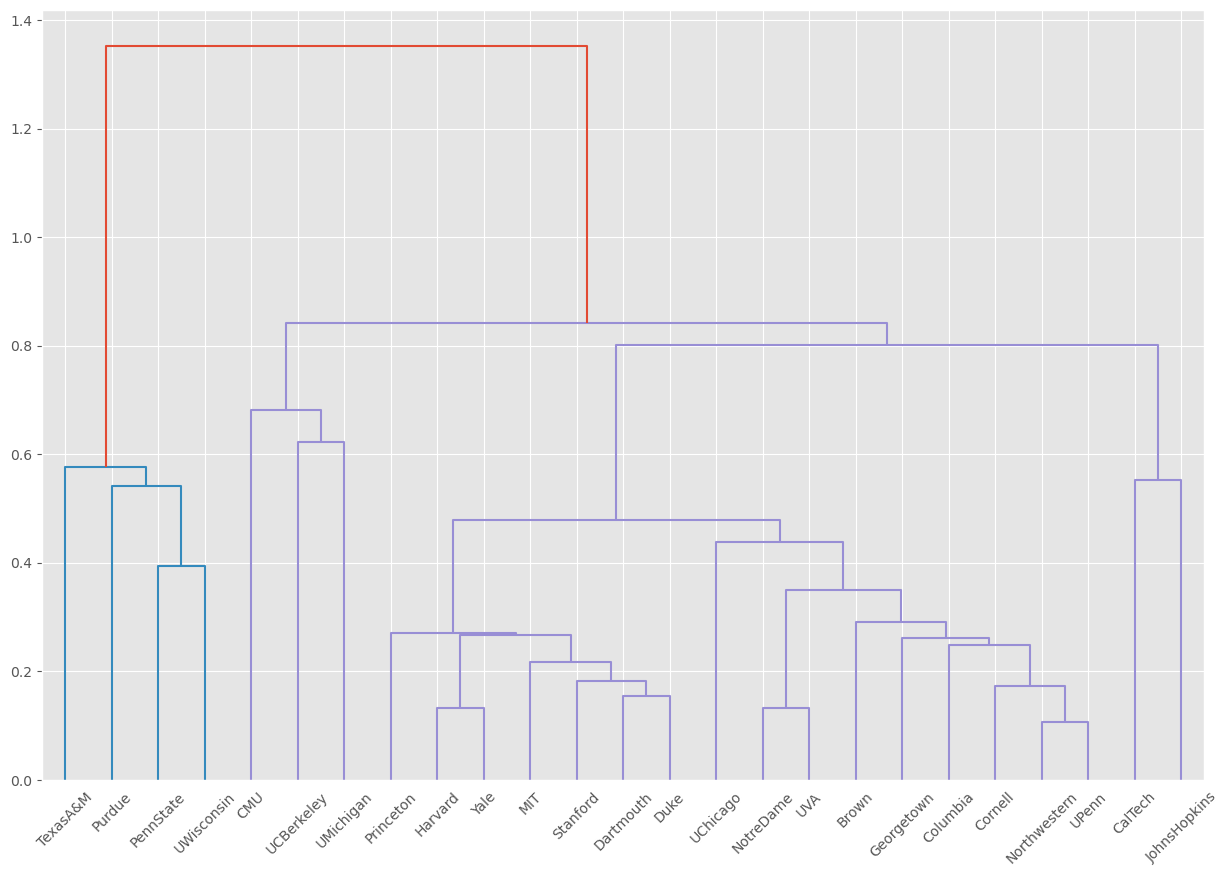

In [5]:
# import dendrogram and linkage from scipy. create linkage object using wards method. display dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(df_scaled, method='average')
plt.figure(figsize=(15, 10))
dendrogram(link, labels=df['Univ'].values);


In [6]:
# clustering using AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')



In [7]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_scaled)
labels

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       0, 1, 0])

In [8]:
# add cluster labels to the dataset
df['cluster_labels'] = labels
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


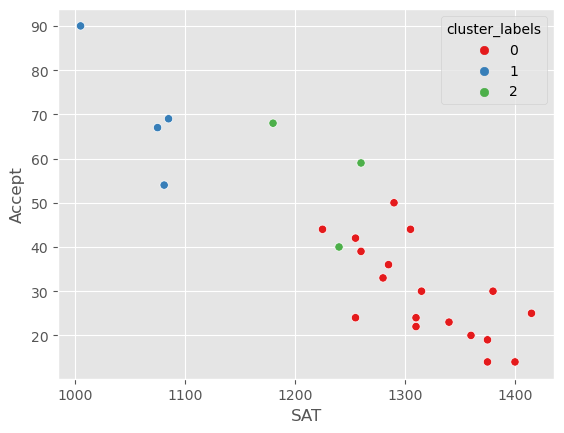

In [9]:
# scatter plot between SAT and Acceptance rate, hue=cluster_labels
sns.scatterplot(x='SAT', y='Accept', data=df, hue='cluster_labels', palette='Set1');

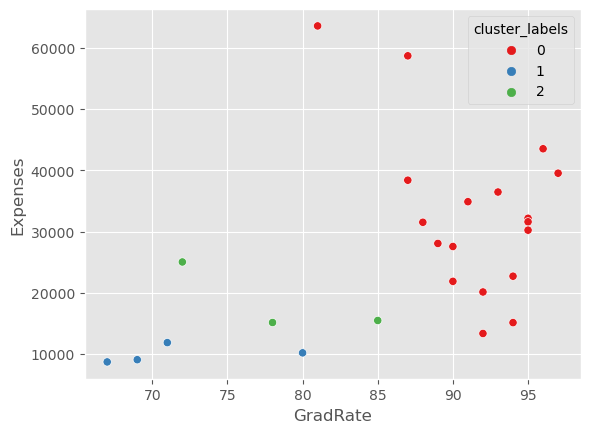

In [10]:
# scatter plot between Grad rate and Expenses, hue=cluster_labels
sns.scatterplot(x='GradRate', y='Expenses', data=df, hue='cluster_labels', palette='Set1');

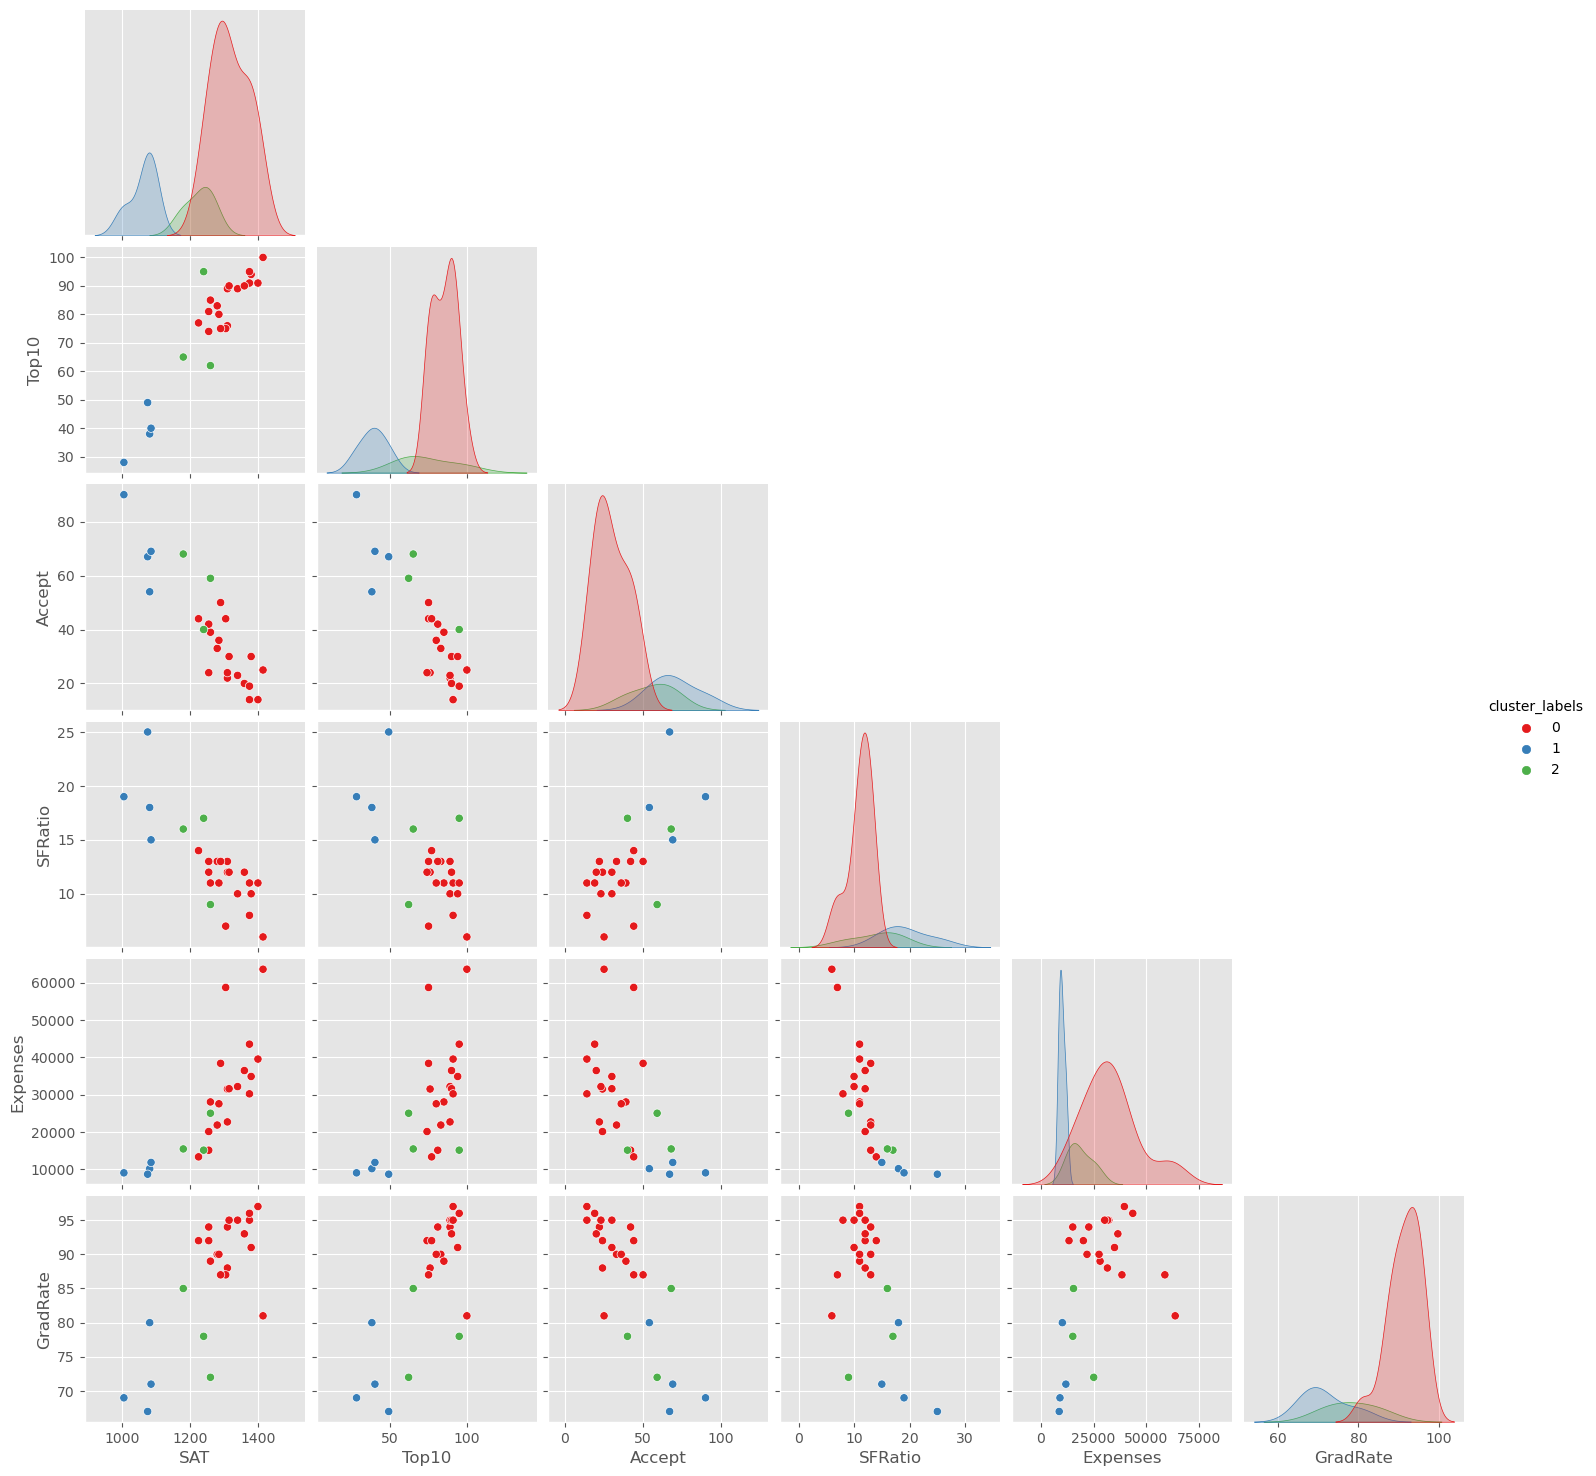

In [12]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df, hue='cluster_labels', palette='Set1',corner=True);

In [13]:
# generate the cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean().round(2)


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster_labels,,,,,,
0,1318.61,85.28,29.61,11.06,32736.22,91.44
1,1061.50,38.75,70.00,19.25,9953.00,71.75
2,1226.67,74.00,55.67,14.00,18545.33,78.33
